In [10]:
import pandas as pd
import numpy as np
from loaders import load_data
import datetime
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

TEST_SIZE = 50
TRAIN_SIZE = 1999

load_GEF = load_data(path_name='data/load_data_track1.csv', test_size=TEST_SIZE, random_state=0)
load_df = pd.read_csv('data/load_data_track1.csv')
load_df.rename( columns={'Unnamed: 0' :'TIMESTAMP'}, inplace=True )
load_df.rename( columns={'LOAD' :'TARGETVAR'}, inplace=True )
load_df['month'] = pd.DatetimeIndex(load_df['TIMESTAMP']).month.values

load_df

#LS 1999 days #VS 50 days # TEST 50 days


,TIMESTAMP,TARGETVAR,w1,w2,w3,w4,w5,w6,w7,w8,...,w17,w18,w19,w20,w21,w22,w23,w24,w25,month
0,2005-01-01 01:00:00,125.8,43,46,40,47,48,46,44,52,...,39,50,45,50,47,41,47,47,45,1
1,2005-01-01 02:00:00,121.8,41,46,38,46,48,45,51,50,...,41,49,46,47,47,45,47,47,45,1
2,2005-01-01 03:00:00,117.0,40,46,37,45,45,45,49,48,...,43,50,45,45,46,45,46,46,43,1
3,2005-01-01 04:00:00,114.4,39,46,37,47,48,48,45,50,...,43,49,43,45,44,45,47,47,44,1
4,2005-01-01 05:00:00,113.6,38,46,37,44,48,49,43,50,...,43,49,43,43,45,45,47,46,44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50371,2010-09-30 20:00:00,176.8,75,70,61,73,72,79,70,71,...,72,73,71,70,77,70,71,71,71,9
50372,2010-09-30 21:00:00,169.4,75,70,61,72,72,79,69,70,...,70,72,70,70,77,70,72,70,70,9
50373,2010-09-30 22:00:00,155.8,74,70,61,71,71,70,70,70,...,70,70,70,70,72,70,71,70,70,9
50374,2010-09-30 23:00:00,143.8,73,70,61,69,71,70,70,70,...,69,72,69,70,69,68,72,72,70,9


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


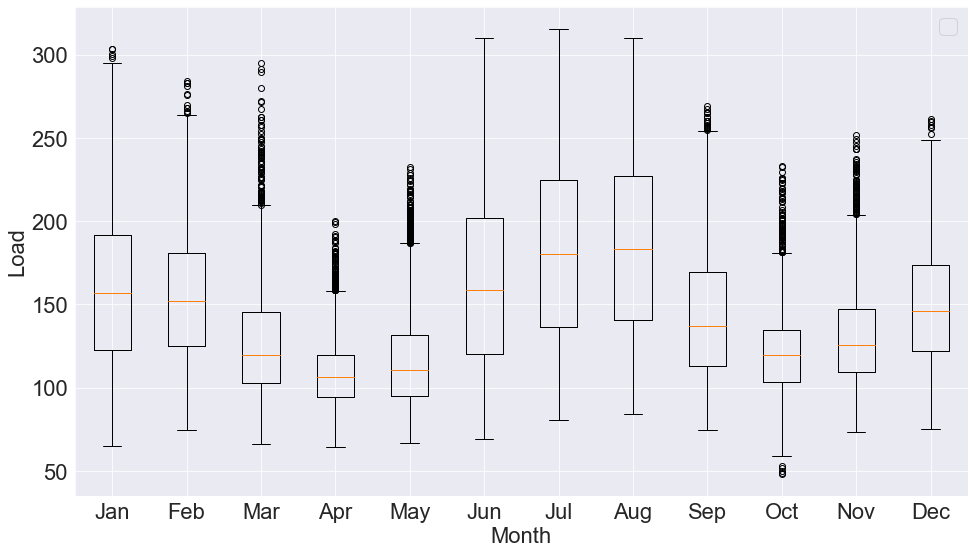

In [127]:
new_arr = []
for i in range(12):
    new_arr.append(load_df[load_df["month"] == i+1]["TARGETVAR"])

labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(16,9))
plt.boxplot(new_arr, labels = labels)
plt.xlabel("Month")
plt.ylabel("Load")
plt.legend()
plt.show()

In [128]:
x = load_df["w1"]
y = load_df["TARGETVAR"]
z = np.polyfit(x, y, 2)
z

array([ 1.09882559e-01, -1.26832187e+01,  4.76680917e+02])

In [129]:
x_1 = np.arange(15,105,1)
y_1 = z[2] + x_1*z[1] + x_1**2 * z[0]
y_1

array([311.1562125 , 301.87935314, 292.82225889, 283.98492976,
       275.36736575, 266.96956686, 258.79153309, 250.83326444,
       243.0947609 , 235.57602249, 228.27704919, 221.19784101,
       214.33839795, 207.69872001, 201.27880718, 195.07865947,
       189.09827689, 183.33765942, 177.79680707, 172.47571984,
       167.37439772, 162.49284073, 157.83104885, 153.38902209,
       149.16676045, 145.16426393, 141.38153253, 137.81856624,
       134.47536508, 131.35192903, 128.4482581 , 125.76435229,
       123.3002116 , 121.05583602, 119.03122557, 117.22638023,
       115.64130001, 114.27598491, 113.13043493, 112.20465007,
       111.49863032, 111.01237569, 110.74588619, 110.6991618 ,
       110.87220253, 111.26500837, 111.87757934, 112.70991542,
       113.76201663, 115.03388295, 116.52551439, 118.23691095,
       120.16807262, 122.31899942, 124.68969133, 127.28014836,
       130.09037051, 133.12035778, 136.37011017, 139.83962767,
       143.5289103 , 147.43795804, 151.5667709 , 155.91

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


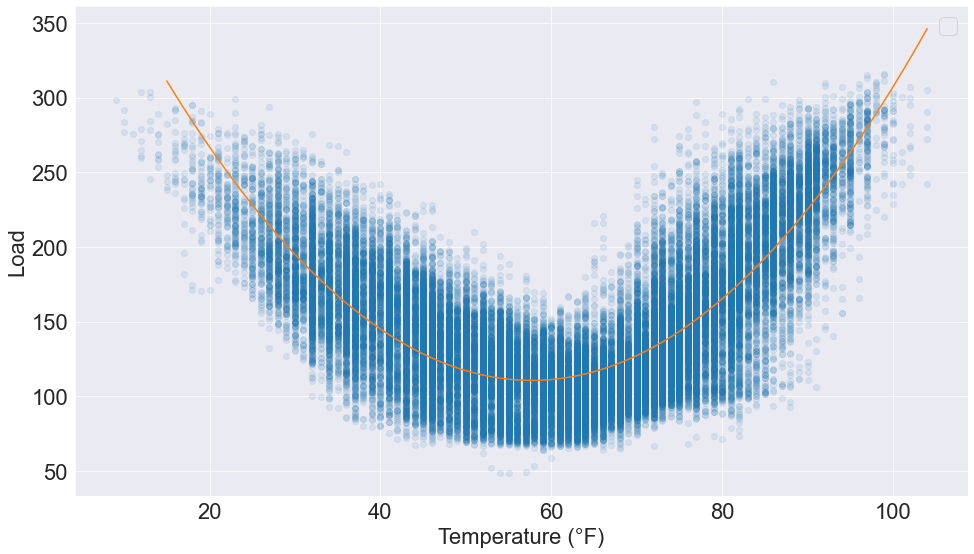

In [130]:
plt.figure(figsize=(16,9))
plt.plot(x, y, 'o', alpha = 0.1)
plt.plot(x_1, y_1)
plt.xlabel("Temperature (°F)")
plt.ylabel("Load")
plt.legend()
plt.show()

In [131]:
import pandas as pd
import numpy as np
from loaders import wind_data
from sklearn.preprocessing import MinMaxScaler
import datetime
import matplotlib.pyplot as plt
import pickle


TEST_SIZE = 50
TRAIN_SIZE = 631
ZONES = ['ZONE_1', 'ZONE_2', 'ZONE_3','ZONE_4','ZONE_5','ZONE_6','ZONE_7','ZONE_8','ZONE_9','ZONE_10']

wind_GEF = wind_data(path_name='data/wind_data_all_zone.csv', test_size=TEST_SIZE, random_state=0)

wind_df = pd.read_csv('data/wind_data_all_zone.csv')

wind_df['OLD_TIMESTAMP'] =  pd.to_datetime(wind_df['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S.%f')
wind_df['TIMESTAMP'] =  pd.DatetimeIndex(wind_df['OLD_TIMESTAMP']) + pd.offsets.Hour(-1)
wind_df['new_date'] = [d.date() for d in wind_df['TIMESTAMP']]
wind_df['month'] = pd.DatetimeIndex(wind_df['TIMESTAMP']).month.values
wind_df

#LS 631 days #VS 50 days # TEST 50 days
#LS 631 days #VS 50 days # TEST 50 days
#LS 631 days #VS 50 days # TEST 50 days
#LS 631 days #VS 50 days # TEST 50 days
#LS 631 days #VS 50 days # TEST 50 days
#LS 631 days #VS 50 days # TEST 50 days
#LS 631 days #VS 50 days # TEST 50 days
#LS 631 days #VS 50 days # TEST 50 days
#LS 631 days #VS 50 days # TEST 50 days
#LS 631 days #VS 50 days # TEST 50 days


,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ZONE_1,ZONE_2,ZONE_3,ZONE_4,ZONE_5,ZONE_6,ZONE_7,ZONE_8,ZONE_9,ZONE_10,OLD_TIMESTAMP,new_date,month
0,2012-01-01 00:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,1,0,0,0,0,0,0,0,0,0,2012-01-01 01:00:00,2012-01-01,1
1,2012-01-01 01:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,1,0,0,0,0,0,0,0,0,0,2012-01-01 02:00:00,2012-01-01,1
2,2012-01-01 02:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,1,0,0,0,0,0,0,0,0,0,2012-01-01 03:00:00,2012-01-01,1
3,2012-01-01 03:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,1,0,0,0,0,0,0,0,0,0,2012-01-01 04:00:00,2012-01-01,1
4,2012-01-01 04:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,1,0,0,0,0,0,0,0,0,0,2012-01-01 05:00:00,2012-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175435,2013-12-31 19:00:00,0.792143,1.032363,-6.281558,2.041033,-11.220655,0,0,0,0,0,0,0,0,0,1,2013-12-31 20:00:00,2013-12-31,12
175436,2013-12-31 20:00:00,0.792143,1.702361,-6.202448,2.846245,-10.486079,0,0,0,0,0,0,0,0,0,1,2013-12-31 21:00:00,2013-12-31,12
175437,2013-12-31 21:00:00,0.792143,5.086629,-1.261378,7.382256,-3.097656,0,0,0,0,0,0,0,0,0,1,2013-12-31 22:00:00,2013-12-31,12
175438,2013-12-31 22:00:00,0.792143,4.183751,-1.580172,5.789054,-2.116548,0,0,0,0,0,0,0,0,0,1,2013-12-31 23:00:00,2013-12-31,12


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


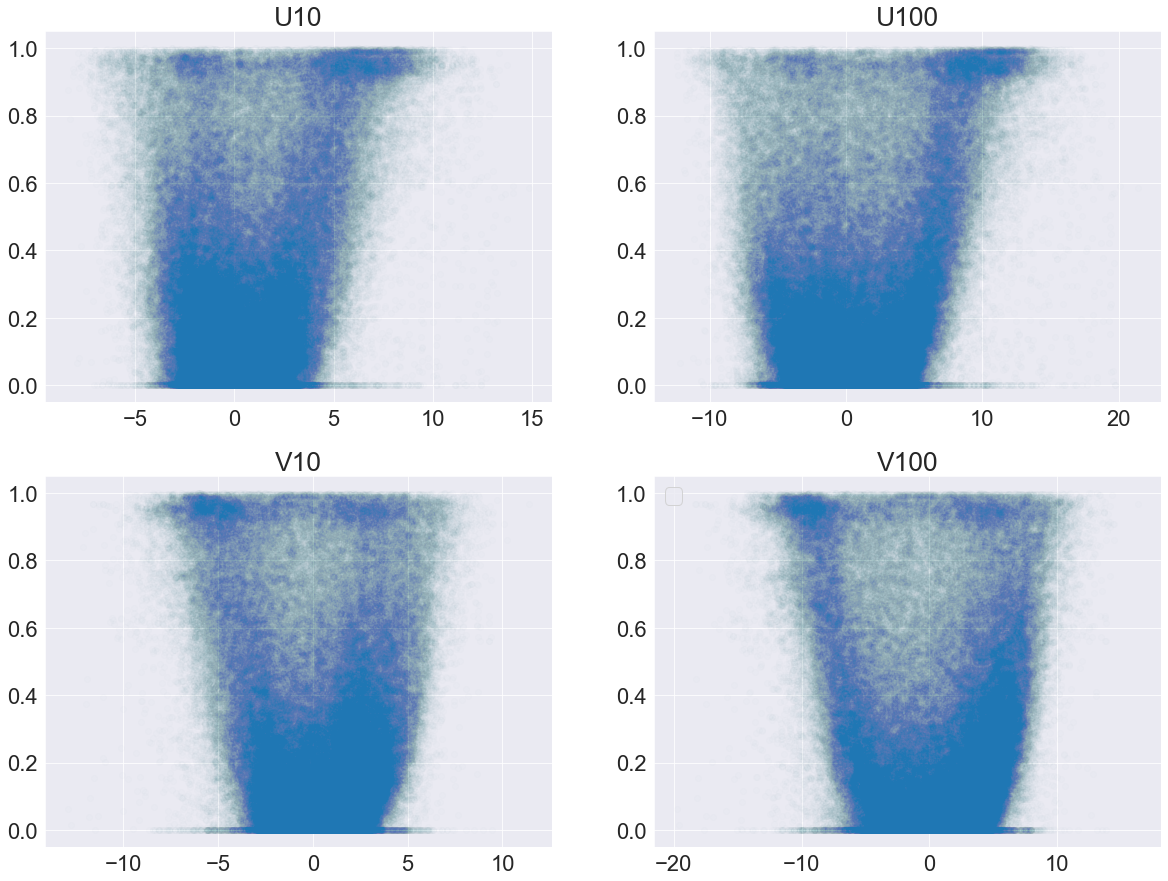

In [132]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(20,15)
axs[0, 0].plot(wind_df["U10"], wind_df["TARGETVAR"], 'o', alpha = 0.007)
axs[0, 0].set_title('U10')
axs[0, 1].plot(wind_df["U100"], wind_df["TARGETVAR"], 'o', alpha = 0.007)
axs[0, 1].set_title('U100')
axs[1, 0].plot(wind_df["V10"], wind_df["TARGETVAR"], 'o', alpha = 0.007)
axs[1, 0].set_title('V10')
axs[1, 1].plot(wind_df["V100"], wind_df["TARGETVAR"], 'o', alpha = 0.007)
axs[1, 1].set_title('V100')
# plt.xlabel("Temperature (°F)")
# plt.ylabel("Load")
plt.legend()
plt.show()

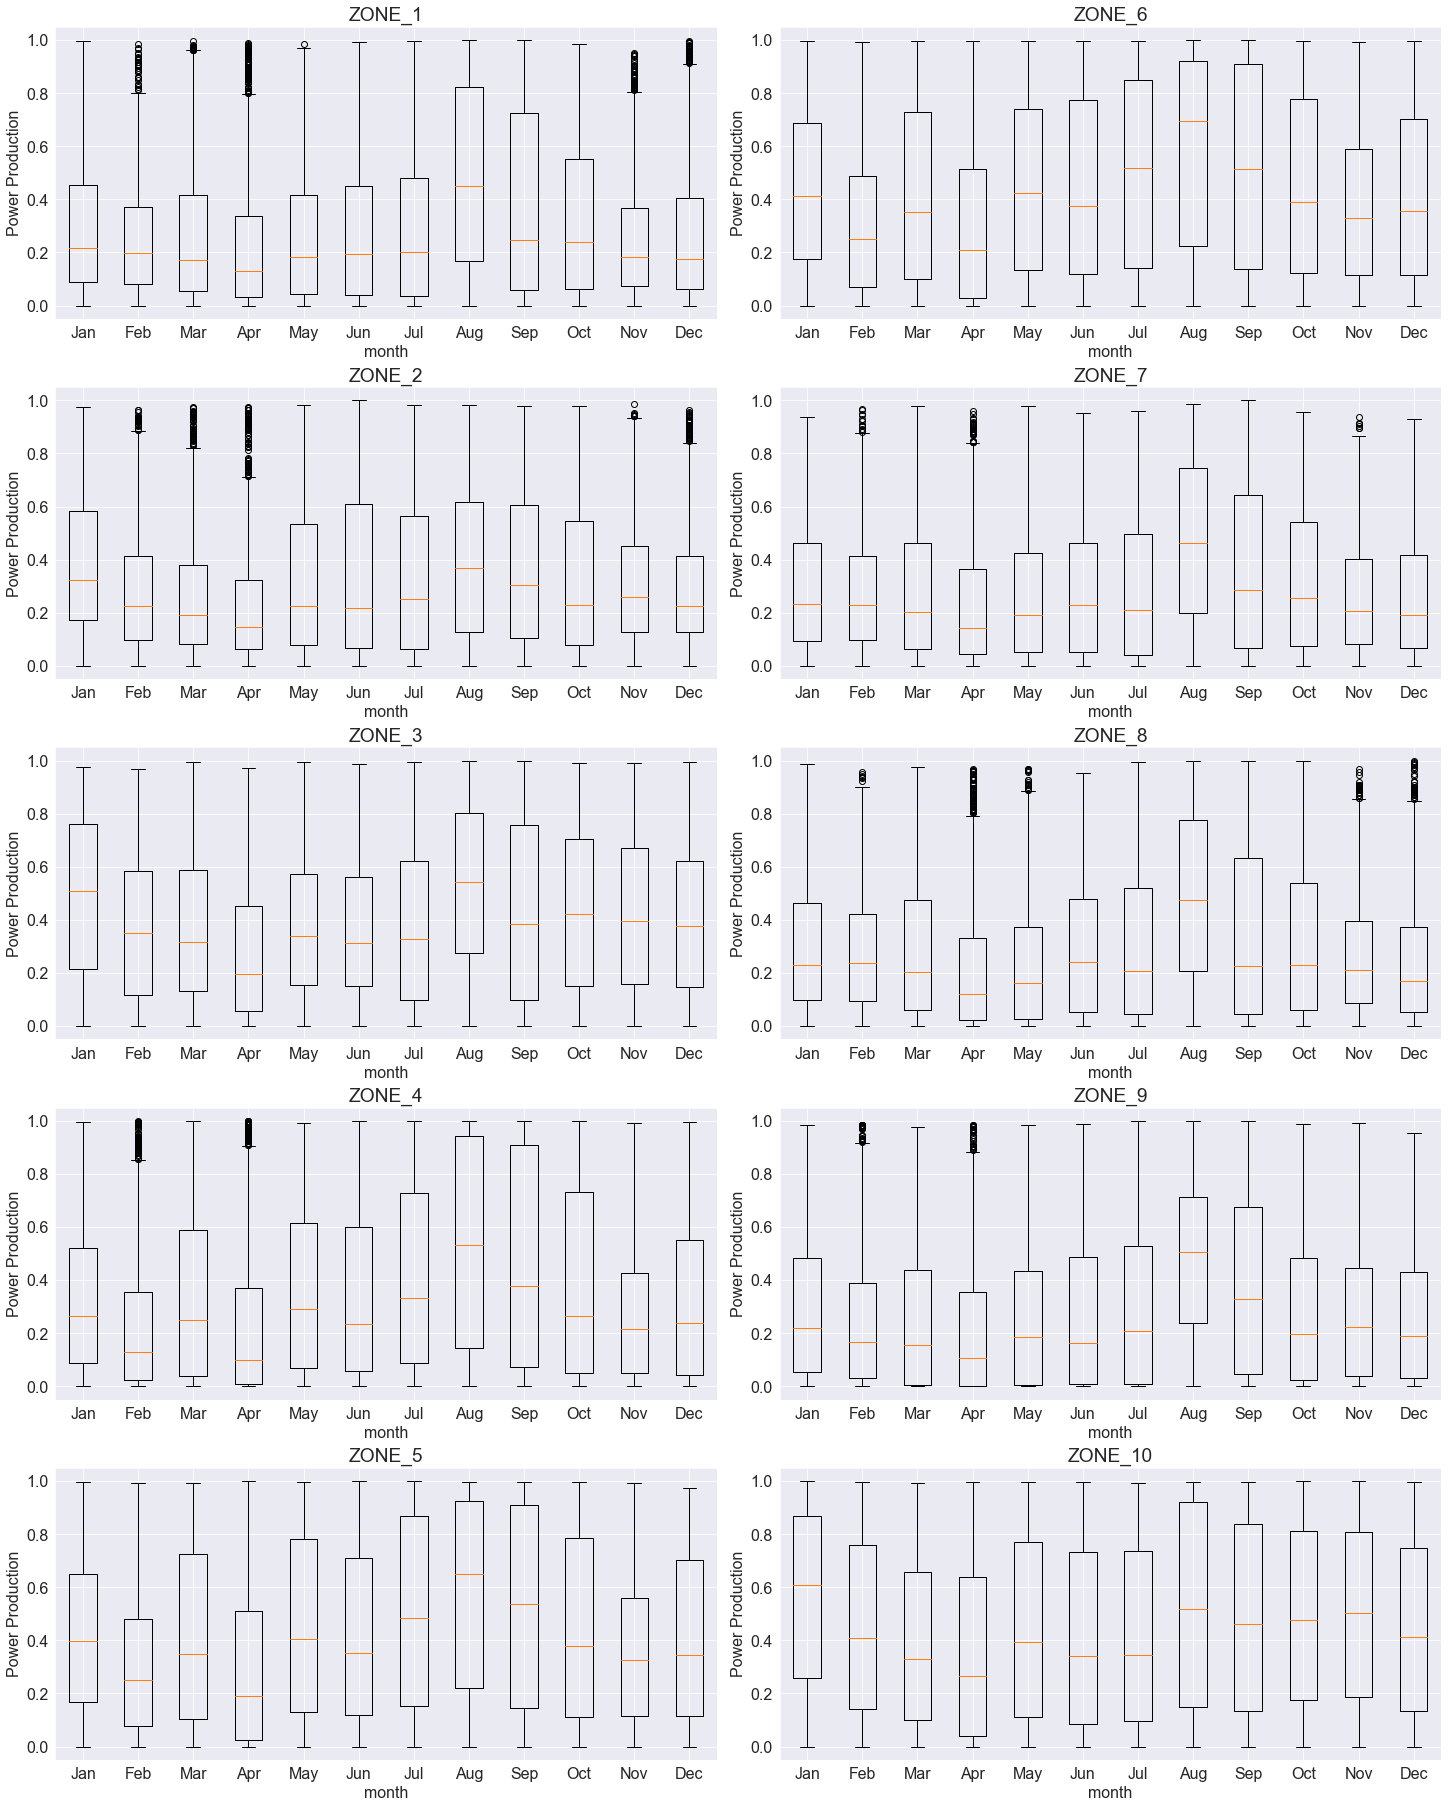

In [145]:

plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(5, 2, constrained_layout = True)

fig.set_size_inches(20,25)
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i in range(10):
    zone = "ZONE_" + str(i+1)
    new_arr = []
    for j in range(12):
        new_arr.append(wind_df[(wind_df["month"] == j+1)&(wind_df[zone] == 1)]["TARGETVAR"])
    if i < 5:
        col = 0
        row = i
    else:
        col = 1
        row = i-5
    axs[row,col].set_title(zone)
    axs[row,col].boxplot(new_arr, labels = labels)
    axs[row,col].set_xlabel('month')
    axs[row,col].set_ylabel('Power Production')
plt.show()

In [73]:
from loaders import pv_data


TEST_SIZE = 50
TRAIN_SIZE = 720
ZONES = ['ZONE_1', 'ZONE_2', 'ZONE_3']

pv_GEF, index = pv_data(path_name='data/solar_new.csv', test_size=TEST_SIZE, random_state=0)
pv_df = pd.read_csv('data/solar_new.csv')

pv_df.rename( columns={'POWER' :'TARGETVAR'}, inplace=True )
pv_df['OLD_TIMESTAMP'] =  pd.to_datetime(pv_df['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S.%f')
pv_df['TIMESTAMP'] =  pd.DatetimeIndex(pv_df['OLD_TIMESTAMP']) + pd.offsets.Hour(-1)
pv_df['hour'] = pd.DatetimeIndex(pv_df['TIMESTAMP']).hour.values
pv_df['month'] = pd.DatetimeIndex(pv_df['TIMESTAMP']).month.values
pv_df['new_date'] = [d.date() for d in pv_df['TIMESTAMP']]
pv_df

zone 1 [ 0  1  2  3 20 21 22 23]
zone 2 [ 0  1  2  3 20 21 22 23]
zone 3 [ 0  1  2  3 20 21 22 23]
ZONE_1 #LS 720 days #VS 50 days # TEST 50 days
ZONE_2 #LS 720 days #VS 50 days # TEST 50 days
ZONE_3 #LS 720 days #VS 50 days # TEST 50 days


,TIMESTAMP,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,...,VAR178,VAR228,TARGETVAR,ZONE_1,ZONE_2,ZONE_3,OLD_TIMESTAMP,hour,month,new_date
0,2012-04-02 00:00:00,0.001480,0.000000,94730.3750,95.559967,0.039764,0.622430,0.318149,284.133057,0.000000,...,0.000000,0.000000e+00,0.0,1.0,0.0,0.0,2012-04-02 01:00:00,0,4,2012-04-02
1,2012-04-02 01:00:00,0.005981,0.000000,94721.5625,99.391953,0.386597,-0.404500,1.343286,282.870117,0.000000,...,0.000000,4.770000e-07,0.0,1.0,0.0,0.0,2012-04-02 02:00:00,1,4,2012-04-02
2,2012-04-02 02:00:00,0.020294,0.000000,94707.7500,99.679733,0.937317,-0.493649,1.279655,282.885498,0.000000,...,0.000000,0.000000e+00,0.0,1.0,0.0,0.0,2012-04-02 03:00:00,2,4,2012-04-02
3,2012-04-02 03:00:00,0.043617,0.000000,94699.6875,100.207092,0.970123,-0.298454,1.204877,283.157227,0.000000,...,0.000000,5.245000e-06,0.0,1.0,0.0,0.0,2012-04-02 04:00:00,3,4,2012-04-02
4,2012-04-02 04:00:00,0.047783,0.000000,94733.3125,99.531464,0.893005,-0.127774,1.207767,283.314209,0.000000,...,0.000000,7.629000e-06,0.0,1.0,0.0,0.0,2012-04-02 05:00:00,4,4,2012-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59035,2014-06-30 19:00:00,0.087723,0.008083,92620.3125,70.493210,0.731356,3.498983,0.649449,276.499268,0.000000,...,0.057222,0.000000e+00,0.0,0.0,0.0,1.0,2014-06-30 20:00:00,19,6,2014-06-30
59036,2014-06-30 20:00:00,0.093201,0.003681,92653.5000,73.417557,0.683899,3.081870,0.055409,276.612060,0.000000,...,0.000000,0.000000e+00,0.0,0.0,0.0,1.0,2014-06-30 21:00:00,20,6,2014-06-30
59037,2014-06-30 21:00:00,0.061859,0.000497,92689.0000,75.435608,0.709900,2.663280,-0.151795,276.960449,0.073056,...,0.000000,0.000000e+00,0.0,0.0,0.0,1.0,2014-06-30 22:00:00,21,6,2014-06-30
59038,2014-06-30 22:00:00,0.062805,0.000186,92732.8125,76.413162,0.941956,2.348825,-0.165719,277.130127,0.000000,...,0.000000,0.000000e+00,0.0,0.0,0.0,1.0,2014-06-30 23:00:00,22,6,2014-06-30


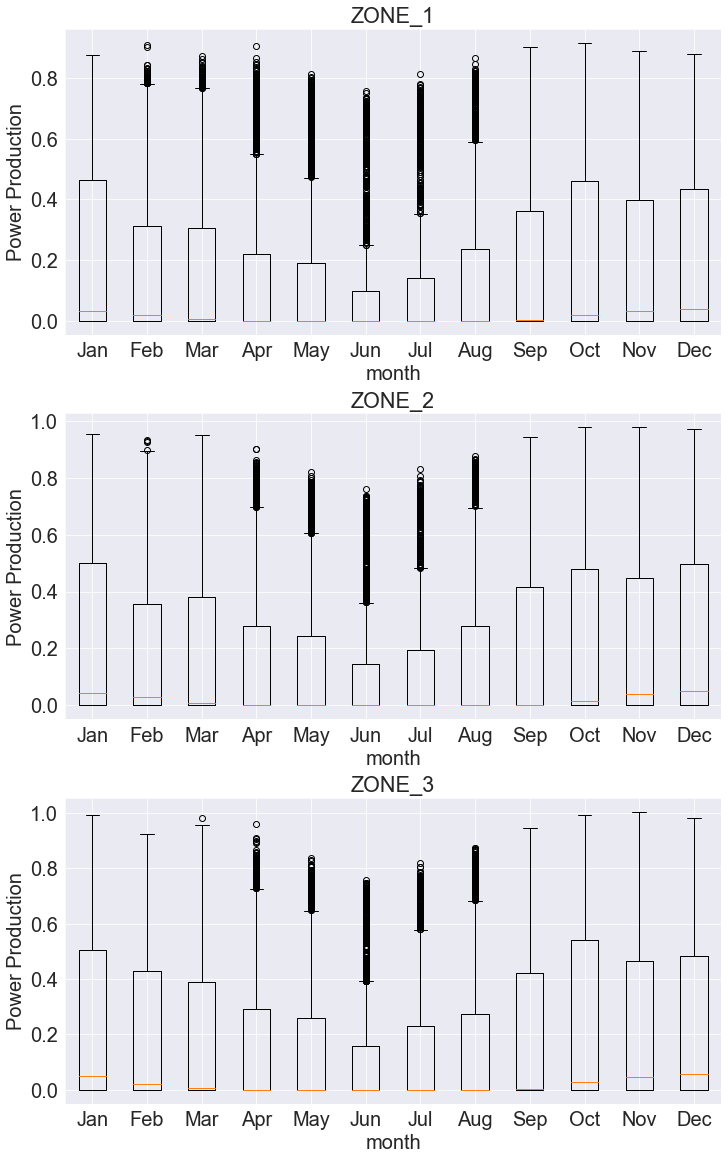

In [ ]:
fig, axs = plt.subplots(3, constrained_layout = True)
fig.set_size_inches(10,16)
plt.rcParams.update({'font.size': 18})
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i in range(3):
    zone = "ZONE_" + str(i+1)
    new_arr = []
    for j in range(12):
        new_arr.append(pv_df[(pv_df["month"] == j+1)&(pv_df[zone] == 1)]["TARGETVAR"])
    axs[i].set_title(zone)
    axs[i].boxplot(new_arr, labels = labels)
    axs[i].set_xlabel('month')
    axs[i].set_ylabel('Power Production')
plt.show()

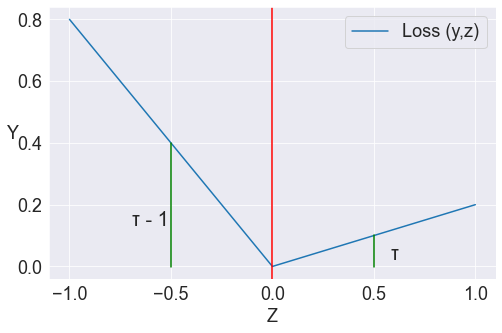

In [153]:
x = np.arange(-1, 1.01, 0.01)
y = []
tau = 0.8
for val in x:
    if val < 0:
        y.append(np.abs(val) * tau)
    else:
        y.append(val * (1 - tau))
        
plt.figure(figsize=(8,5))
plt.plot(x, y, label = "Loss (y,z)")

plt.axvline(x = 0, color = 'r')
plt.axvline(x = 0.5, ymin = 0.045, ymax = 0.16, color = 'g')
plt.axvline(x = -0.5, ymin = 0.045, ymax = 0.5, color = 'g')
plt.text(-0.6, 0.15, 'τ - 1', horizontalalignment='center',
     verticalalignment='center', fontsize=20)
plt.text(0.6, 0.04, 'τ', horizontalalignment='center',
     verticalalignment='center', fontsize=20)
plt.xlabel("Z")
plt.ylabel("Y", rotation = 0)
plt.legend()
plt.show()